In [11]:
import os, sys
from pathlib import Path

from PIL import Image, ImageDraw, ImageFont
import textwrap
from tqdm import tqdm

from utils import create_strings_from_wikipedia

In [15]:
import wikipedia
from PIL import Image, ImageDraw, ImageFont
import textwrap

def get_random_page_content() -> str:
    page_title = wikipedia.random(1)
    try:
        page_content = wikipedia.page(page_title).summary
    except (wikipedia.DisambiguationError, wikipedia.PageError):
        return get_random_page_content()
    return page_content

def create_strings_from_wikipedia(minimum_length: int, maximum_length: int, count: int, lang: str) -> list:
    """
        Create strings by randomly picking Wikipedia articles and taking sentences from their summaries.
    """
    wikipedia.set_lang(lang)
    sentences = []

    while len(sentences) < count:
        page_content = get_random_page_content()
        processed_content = page_content.replace("\n", " ").split(". ")
        sentence_candidates = [
            s.strip() for s in processed_content 
            if minimum_length <= len(s.split()) <= maximum_length
        ]
        sentences.extend(sentence_candidates)

    return sentences[:count]

def create_paragraph_image(sentences_per_paragraph: int, output_extension: str):
    """
        Create paragraphs for training image datasets.
    """
    sentences = create_strings_from_wikipedia(minimum_length=1, maximum_length=7, count=20, lang='ko')
    paragraphs = [' '.join(sentences[i:i+sentences_per_paragraph]) 
                  for i in range(0, len(sentences), sentences_per_paragraph)]
    
    # 이미지 config
    margin = 20
    line_height = 30
    paragraph_spacing = 20
    max_width = 400  # 최대 너비 제한
    font_size = 20
    
    # 폰트 설정
    font = ImageFont.truetype("resources/fonts/GmarketSansTTFLight.ttf", font_size)
    
    # 텍스트 크기 계산
    img_width = margin * 2
    img_height = margin * 2
    wrapped_paragraphs = []
    
    for paragraph in paragraphs:
        wrapped = textwrap.wrap(paragraph, width=max_width//10)  # 대략적인 폭 추정
        wrapped_paragraphs.append(wrapped)
        w = max([font.getbbox(line)[2] - font.getbbox(line)[0] for line in wrapped])
        h = len(wrapped) * line_height
        img_width = max(img_width, w + margin * 2)
        img_height += h + paragraph_spacing

    img_height -= paragraph_spacing  # 마지막 문단 후의 추가 간격 제거
    
    # 이미지 생성
    background_color = (255, 255, 255)  # 흰색
    text_color = (0, 0, 0)  # 검은색
    image = Image.new('RGB', (img_width, img_height), background_color)
    draw = ImageDraw.Draw(image)
    
    # 텍스트 그리기
    y_text = margin
    for wrapped in wrapped_paragraphs:
        for line in wrapped:
            draw.text((margin, y_text), line, font=font, fill=text_color)
            y_text += line_height
        y_text += paragraph_spacing
    
    # 이미지 저장
    image.save("out/"+output_extension)
    return image
# 5개의 문장을 하나의 문단으로 구성하여 이미지 생성
create_paragraph_image(sentences_per_paragraph=5, output_extension=".png")

c:\Users\user\anaconda3\envs\korean\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\user\anaconda3\envs\korean\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


ValueError: unknown file extension: 

In [32]:
import os, sys
from datetime import datetime
import errno
from pathlib import Path
from glob import glob

import random

from PIL import Image, ImageDraw, ImageFont
import textwrap
from tqdm import tqdm

from pigen.parser import argument_parser
from pigen.utils import create_strings_from_wikipedia

i=0
current_info = datetime.now().strftime(f"%y%m%d_%H%M%S")
img_name = current_info + str(i)
args = argument_parser().parse_args()
print(img_name + '.' + args.extension)


usage: ipykernel_launcher.py [-h] -c [COUNT] [-out [OUTPUT_DIR]]
                             [-maxl [MAX_LENGTH]] [-minl [MIN_LENGTH]]
                             [-ns [N_SENTENCE]] [-np [N_PARAGRAPH]]
                             [-e [EXTENSION]] [-wk | -dt DICT]
                             [-sw [SPACE_WIDTH]] [-cs [CHARACTER_SPACING]]
                             [-ft [FONT]] [-fs [FONTSIZE]] [-f [FORMAT]]
                             [-wd [WIDTH]] [-b [BACKGROUND]] [-om OUTPUT_MASK]
                             [-al [ALIGNMENT]] [-fi] [-id [IMAGE_DIR]]
                             [-t [THREAD_COUNT]]
ipykernel_launcher.py: error: ambiguous option: --f=c:\Users\user\AppData\Roaming\jupyter\runtime\kernel-v2-13704PoRldloL9zMY.json could match --font, --fontsize, --format, --fit


SystemExit: 2

In [40]:
sentences_per_paragraph = 5

In [45]:
paragraphs = [' '.join(sentences[i:i+sentences_per_paragraph])
              for i in range(0, len(sentences), sentences_per_paragraph)]

paragraph = paragraphs[0]
max_width = 400
wrapped = textwrap.wrap(paragraph, width=max_width//10)  # 대략적인 폭 추정
#wrapped_paragraphs.append(wrapped)



['샤마빠는 티베트 불교 까마까귀 홍모파(紅帽派)의 최고 지도자이다 정식',
 '칭호는 쾬직샤마빠이고, 홍모까마빠 또는 홍모라마라고도 한다 2015년',
 '2월 15일에 서비스를 시작하였다 2015년 4월 17일 청주시의',
 '향토유적 제102호로 지정되었다. 이 게임은 6세대 콘솔의 마지막',
 'FIFA 에디션이다']

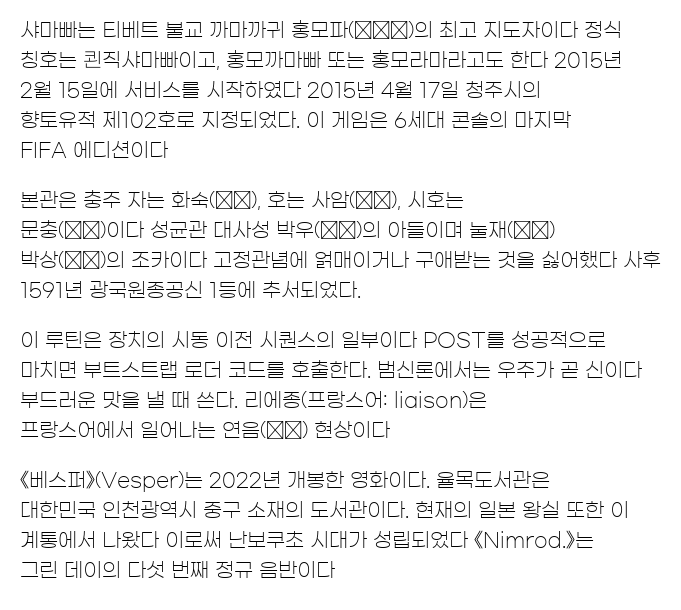